In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

import matplotlib.style as style
from xgboost import plot_tree

from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from IPython.display import Audio
sound_file = '/Users/rogerrabbit/Library/Application Support/Google/Chrome/Default/Extensions/lojgmehidjdhhbmpjfamhpkpodfcodef/34_0/audio/0f034826.mp3'

# Fonction

In [2]:

def FilterOne(d, x):
    d1 = d.isnull().sum() / x * 100
    d2 = pd.DataFrame(data=d1)
    d3 = d2.rename(columns={0: 'RatioEmpty'})
    d4 = d3.T
    d = d.append(d4, ignore_index=True)
    d5 = d.T
    d6 = d5.rename(columns={x: 'EmptyRatio'})
    d7 = d6.drop(d6[d6.EmptyRatio > 50].index)
    d8 = d7.T
    d9 = d8[:-1]
    return d9


def mEmptyCell(data):
    all_empty_cell = round((sum(data.isnull().sum())) * 100 / (len(data) * len(data.columns)))
    return all_empty_cell

def variableCount(x):
    item_c = data03[x].value_counts()
    item_c_df = pd.DataFrame(item_c)
    d6 = item_c_df.rename(columns={x: 'Count'})
    d6[x] = d6.index
    ax = sns.barplot(x=x, y="Count", data=d6, ci=68)
    return d6


# Mise en forme et nettoyage

In [3]:
#Fonction 

d_15 = pd.read_csv('2015.csv')
d_16 = pd.read_csv('2016.csv')

d_15_f1 = FilterOne(d_15, 3340)
d_16_f1 = FilterOne(d_16, 3376)

df1 = d_15_f1["Location"].str.split(":", n=10, expand=True)
for x in range(8):
    d_15_f1[x] = df1[x]

df1 = d_15_f1[1].str.split(",", n=2, expand=True)
df1_r = df1[0].str.replace("'", '')
d_15_f1['Latitude'] = df1_r

df2 = d_15_f1[2].str.split(",", n=2, expand=True)
df2_r = df2[0].str.replace("'", '')
d_15_f1['Longitude'] = df2_r

df3 = d_15_f1[4].str.split(",", n=2, expand=True)
df3_r = df3[0].str.replace('"', '')
d_15_f1['Address'] = df3_r

df4 = d_15_f1[5].str.split(',', n=1, expand=True)
df4_r = df4[0].str.replace('"', '')
d_15_f1['City'] = df4_r

df5 = d_15_f1[6].str.split(",", n=1, expand=True)
df5_r = df5[0].str.replace('"', '')
d_15_f1['State'] = df5_r

df6 = d_15_f1[7].str.split("}", n=1, expand=True)
df6_r = df6[0].str.replace('"', '')
d_15_f1['ZipCode'] = df6_r

d_15_f1.drop(1, inplace=True, axis=1)
d_15_f1.drop(2, inplace=True, axis=1)
d_15_f1.drop(3, inplace=True, axis=1)
d_15_f1.drop(4, inplace=True, axis=1)
d_15_f1.drop(5, inplace=True, axis=1)
d_15_f1.drop(6, inplace=True, axis=1)
d_15_f1.drop(7, inplace=True, axis=1)
d_15_f1.drop('Location', inplace=True, axis=1)

d1 = d_15_f1["OSEBuildingID"]
d2 = d_16_f1["OSEBuildingID"]
d11 = pd.DataFrame(d1)
d21 = pd.DataFrame(d2)
d_2015 = d11.merge(d21, on='OSEBuildingID', how='outer', suffixes=['', '_'], indicator=True)
d_2015_1 = d_2015.loc[d_2015['_merge'] != 'both']
d_2015_2 = d_2015_1.loc[d_2015['_merge'] != 'right_only']

d_2015_3 = pd.merge(d_15_f1, d_2015_2, on=["OSEBuildingID", "OSEBuildingID"])

data = d_2015_3.append(d_16_f1)
data01 = data.sort_values(by=['OSEBuildingID'], ascending=True)
data02 = data01.reset_index()
#data02.drop('index', ad=True, axis=1)
data02.drop('_merge', inplace=True, axis=1)
data02.drop(0, inplace=True, axis=1)
data02.replace(0, np.nan, inplace=True)
data03 = FilterOne(data02, 3432)

data03_ = data03["ListOfAllPropertyUseTypes"].str.split(",", n=1, expand=True)
data03['ListOfAllPropertyUseTypes'] = data03_[0]
data03.drop('ListOfAllPropertyUseTypes', inplace=True, axis=1)
data03.drop('LargestPropertyUseType', inplace=True, axis=1)

data03.drop('OSEBuildingID', inplace=True, axis=1)
data03.drop('DataYear', inplace=True, axis=1)
data03.drop('BuildingType', inplace=True, axis=1)
data03.drop('PropertyName', inplace=True, axis=1)
data03.drop('TaxParcelIdentificationNumber', inplace=True, axis=1)
data03.drop('Neighborhood', inplace=True, axis=1)
data03.drop('NumberofBuildings', inplace=True, axis=1)
data03.drop('City', inplace=True, axis=1)
data03.drop('Address', inplace=True, axis=1)
data03.drop('State', inplace=True, axis=1)
data03.drop('PrimaryPropertyType', inplace=True, axis=1)
data03.drop('GHGEmissionsIntensity', inplace=True, axis=1)
data03.drop('ComplianceStatus', inplace=True, axis=1)
data03.drop('CouncilDistrictCode', inplace=True, axis=1)
data_04 = data03.dropna()

import time
import matplotlib
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (15, 15)})
for i in tqdm(range(5)):
    time.sleep(1)


def FilterOne(d, x):
    d1 = d.isnull().sum() / x * 100
    d2 = pd.DataFrame(data=d1)
    d3 = d2.rename(columns={0: 'RatioEmpty'})
    d4 = d3.T
    d = d.append(d4, ignore_index=True)
    d5 = d.T
    d6 = d5.rename(columns={x: 'EmptyRatio'})
    d7 = d6.drop(d6[d6.EmptyRatio > 50].index)
    d8 = d7.T
    d9 = d8[:-1]
    return d9


def mEmptyCell(data):
    all_empty_cell = round((sum(data.isnull().sum())) * 100 / (len(data) * len(data.columns)))
    return all_empty_cell


d_15 = pd.read_csv('2015.csv')
d_16 = pd.read_csv('2016.csv')

d_15_f1 = FilterOne(d_15, 3340)
d_16_f1 = FilterOne(d_16, 3376)

df1 = d_15_f1["Location"].str.split(":", n=10, expand=True)
for x in range(8):
    d_15_f1[x] = df1[x]

df1 = d_15_f1[1].str.split(",", n=2, expand=True)
df1_r = df1[0].str.replace("'", '')
d_15_f1['Latitude'] = df1_r

df2 = d_15_f1[2].str.split(",", n=2, expand=True)
df2_r = df2[0].str.replace("'", '')
d_15_f1['Longitude'] = df2_r

df3 = d_15_f1[4].str.split(",", n=2, expand=True)
df3_r = df3[0].str.replace('"', '')
d_15_f1['Address'] = df3_r

df4 = d_15_f1[5].str.split(',', n=1, expand=True)
df4_r = df4[0].str.replace('"', '')
d_15_f1['City'] = df4_r

df5 = d_15_f1[6].str.split(",", n=1, expand=True)
df5_r = df5[0].str.replace('"', '')
d_15_f1['State'] = df5_r

df6 = d_15_f1[7].str.split("}", n=1, expand=True)
df6_r = df6[0].str.replace('"', '')
d_15_f1['ZipCode'] = df6_r

d_15_f1.drop(1, inplace=True, axis=1)
d_15_f1.drop(2, inplace=True, axis=1)
d_15_f1.drop(3, inplace=True, axis=1)
d_15_f1.drop(4, inplace=True, axis=1)
d_15_f1.drop(5, inplace=True, axis=1)
d_15_f1.drop(6, inplace=True, axis=1)
d_15_f1.drop(7, inplace=True, axis=1)
d_15_f1.drop('Location', inplace=True, axis=1)

d1 = d_15_f1["OSEBuildingID"]
d2 = d_16_f1["OSEBuildingID"]
d11 = pd.DataFrame(d1)
d21 = pd.DataFrame(d2)
d_2015 = d11.merge(d21, on='OSEBuildingID', how='outer', suffixes=['', '_'], indicator=True)
d_2015_1 = d_2015.loc[d_2015['_merge'] != 'both']
d_2015_2 = d_2015_1.loc[d_2015['_merge'] != 'right_only']

d_2015_3 = pd.merge(d_15_f1, d_2015_2, on=["OSEBuildingID", "OSEBuildingID"])

data = d_2015_3.append(d_16_f1)
data01 = data.sort_values(by=['OSEBuildingID'], ascending=True)
data02 = data01.reset_index()
data02.drop('index', inplace=True, axis=1)
data02.drop('_merge', inplace=True, axis=1)
data02.drop(0, inplace=True, axis=1)
data02.replace(0, np.nan, inplace=True)
data03 = FilterOne(data02, 3432)

#On garde les variables Fixes


data03_ = data03["ListOfAllPropertyUseTypes"].str.split(",", n=1, expand=True)

data03.drop('OSEBuildingID', inplace=True, axis=1)
data03.drop('PropertyName', inplace=True, axis=1)
data03.drop('TaxParcelIdentificationNumber', inplace=True, axis=1)
data03.drop('CouncilDistrictCode', inplace=True, axis=1)
data03.drop('DataYear', inplace=True, axis=1)
data03.drop('NumberofBuildings', inplace=True, axis=1)
data03.drop('City', inplace=True, axis=1)
data03.drop('Address', inplace=True, axis=1)
data03.drop('State', inplace=True, axis=1)
data03.drop('GHGEmissionsIntensity', inplace=True, axis=1)
data03.drop('ComplianceStatus', inplace=True, axis=1)
data03.drop('SiteEUI(kBtu/sf)', inplace=True, axis=1)
data03.drop('SiteEUIWN(kBtu/sf)', inplace=True, axis=1)
data03.drop('SourceEUI(kBtu/sf)', inplace=True, axis=1)
data03.drop('SourceEUIWN(kBtu/sf)', inplace=True, axis=1)
data03.drop('SiteEnergyUse(kBtu)', inplace=True, axis=1)
data03.drop('SiteEnergyUseWN(kBtu)', inplace=True, axis=1)
data03.drop('TotalGHGEmissions', inplace=True, axis=1)
data03.drop('NaturalGas(therms)', inplace=True, axis=1)
data03.drop('ZipCode', inplace=True, axis=1)
data03.drop('Electricity(kBtu)', inplace=True, axis=1)
data03.drop('NaturalGas(kBtu)', inplace=True, axis=1)
b = data03.rename(columns={'Electricity(kWh)': "Electricity"})
data03 = b.sort_values(by=['Electricity'], ascending=True)
data03

100%|██████████| 5/5 [00:05<00:00,  1.00s/it]


,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,Electricity,Latitude,Longitude
3261,NonResidential,Small- and Mid-Sized Office,CENTRAL,2013,6,52000,52000,Office,Office,48159,100,-33826.8,47.6143,-122.313
1698,NonResidential,Other,NORTHWEST,1970,1,23166,23166,Other,Other,23166,NaN,1,47.7097,-122.346
175,NonResidential,K-12 School,NORTHEAST,1928,2,55653,55653,K-12 School,K-12 School,55500,98,1798.9,47.6657,-122.314
2493,NonResidential,Low-Rise Multifamily,EAST,1910,3,32100,32100,"Bar/Nightclub, Multifamily Housing",Multifamily Housing,21400,NaN,3332.5,47.6143,-122.32
3396,Multifamily MR (5-9),Mid-Rise Multifamily,EAST,2015,7,41384,26322,"Multifamily Housing, Other - Restaurant/Bar, P...",Multifamily Housing,34643,100,3930,47.6211,-122.322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,Multifamily LR (1-4),Low-Rise Multifamily,NORTHWEST,1989,4,29562,21031,NaN,NaN,NaN,NaN,NaN,47.6966,-122.343
2524,Multifamily LR (1-4),Low-Rise Multifamily,SOUTHWEST,1969,3,30420,30420,NaN,NaN,NaN,NaN,NaN,47.5897,-122.386
2715,NonResidential,Mixed Use Property,NORTHEAST,1928,2,20760,20760,NaN,NaN,NaN,NaN,NaN,47.6618,-122.313
3220,SPS-District K-12,K-12 School,MAGNOLIA / QUEEN ANNE,1952,1,116101,116101,K-12 School,K-12 School,119685,NaN,NaN,47.6434,-122.4


# On garde les variables Fixes

In [4]:
data03.replace('NonResidential', "NonResidential", inplace=True)
data03.replace('Nonresidential COS', "NonResidential", inplace=True)
data03.replace('Campus', "School", inplace=True)
data03.replace('SPS-District K-12', "School", inplace=True)
data03.replace('Multifamily LR (1-4)', "Multifamily", inplace=True)
data03.replace('Multifamily MR (5-9)', "Multifamily", inplace=True)
data03.replace('Multifamily HR (10+)', "Multifamily", inplace=True)
data03.replace('Nonresidential WA', "NonResidential", inplace=True)

data03.replace('MAGNOLIA / QUEEN ANNE', "MAGNOLIA_QUEEN_ANNE", inplace=True)
data03.replace('LAKE UNION', "LAKE_UNION", inplace=True)
data03.replace('GREATER DUWAMISH', "GREATER_DUWAMISH", inplace=True)
data03.replace('DELRIDGE NEIGHBORHOODS',"DELRIDGE", inplace=True)
data03.replace('Delridge',"DELRIDGE", inplace=True)
data03.replace('Central', "CENTRAL", inplace=True)
data03.replace('Ballard', "BALLARD", inplace=True)
data03.replace('North', "NORTH", inplace=True)
data03.replace('Northwest', "NORTHWEST", inplace=True)

data03.replace("Hotel","Hotel", inplace=True)
data03.replace("Other","Other", inplace=True)
data03.replace("Mid-Rise Multifamily","Multifamily", inplace=True)
data03.replace("Mixed Use Property","Other", inplace=True)
data03.replace("K-12 School",'School', inplace=True)
data03.replace("University","School", inplace=True)
data03.replace("Small- and Mid-Sized Office","Office", inplace=True)
data03.replace("Self-Storage Facility",'Other', inplace=True)
data03.replace("Large Office","Office", inplace=True)
data03.replace("Warehouse",'Other', inplace=True)
data03.replace("Hotel","Hotel", inplace=True)
data03.replace("Low-Rise Multifamily",'Multifamily', inplace=True)
data03.replace("Retail Store","Store", inplace=True)
data03.replace("Senior Care Community","Medical", inplace=True)
data03.replace("Hospital",'Medical', inplace=True)
data03.replace("Medical Office","Medical", inplace=True)
data03.replace("Residence Hall","Multifamily", inplace=True)
data03.replace("Distribution Center",'Other', inplace=True)
data03.replace("Supermarket / Grocery Store","Store", inplace=True)
data03.replace("K-12 School","School", inplace=True)
data03.replace("Worship Facility","Worship", inplace=True)
data03.replace("University","School", inplace=True)
data03.replace("Laboratory","Other", inplace=True)
data03.replace("Small- and Mid-Sized Office","Office", inplace=True)
data03.replace("Refrigerated Warehouse",'Other', inplace=True)
data03.replace("Self-Storage Facility",'Other', inplace=True)
data03.replace("Non-Refrigerated Warehouse",'Other', inplace=True)
data03.replace("Warehouse","Other", inplace=True)
data03.replace("High-Rise Multifamily",'Multifamily', inplace=True)
data03.replace("Large Office","Office", inplace=True)
data03.replace("Restaurant\n","Restaurant", inplace=True)
data03.replace("Restaurant","Restaurant", inplace=True)
data03.replace("Office","Office", inplace=True)



data03.drop('ListOfAllPropertyUseTypes', inplace=True, axis=1)
data03.drop('LargestPropertyUseType', inplace=True, axis=1)

dummies = pd.get_dummies(data03[['Neighborhood', 'BuildingType']])

data03 = data03.drop(['PrimaryPropertyType', 'Neighborhood', 'BuildingType'], axis = 1).astype('float64')

# Define the feature set X.
data03 = pd.concat([data03, dummies], axis=1)
data03



,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,Electricity,Latitude,Longitude,Neighborhood_BALLARD,...,Neighborhood_LAKE_UNION,Neighborhood_MAGNOLIA_QUEEN_ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,BuildingType_Multifamily,BuildingType_NonResidential,BuildingType_School
3261,2013.0,6.0,52000.0,52000.0,48159.0,100.0,-33826.800780,47.61432,-122.31257,0,...,0,0,0,0,0,0,0,0,1,0
1698,1970.0,1.0,23166.0,23166.0,23166.0,NaN,1.000000,47.70969,-122.34557,0,...,0,0,0,0,1,0,0,0,1,0
175,1928.0,2.0,55653.0,55653.0,55500.0,98.0,1798.900024,47.66568,-122.31368,0,...,0,0,0,1,0,0,0,0,1,0
2493,1910.0,3.0,32100.0,32100.0,21400.0,NaN,3332.500000,47.61427,-122.31977,0,...,0,0,0,0,0,0,0,0,1,0
3396,2015.0,7.0,41384.0,26322.0,34643.0,100.0,3930.000000,47.62107,-122.32156,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,1989.0,4.0,29562.0,21031.0,NaN,NaN,NaN,47.69658,-122.34342,0,...,0,0,0,0,1,0,0,1,0,0
2524,1969.0,3.0,30420.0,30420.0,NaN,NaN,NaN,47.58968,-122.38587,0,...,0,0,0,0,0,0,1,1,0,0
2715,1928.0,2.0,20760.0,20760.0,NaN,NaN,NaN,47.66182,-122.31345,0,...,0,0,0,1,0,0,0,0,1,0
3220,1952.0,1.0,116101.0,116101.0,119685.0,NaN,NaN,47.64342,-122.39970,0,...,0,1,0,0,0,0,0,0,0,1


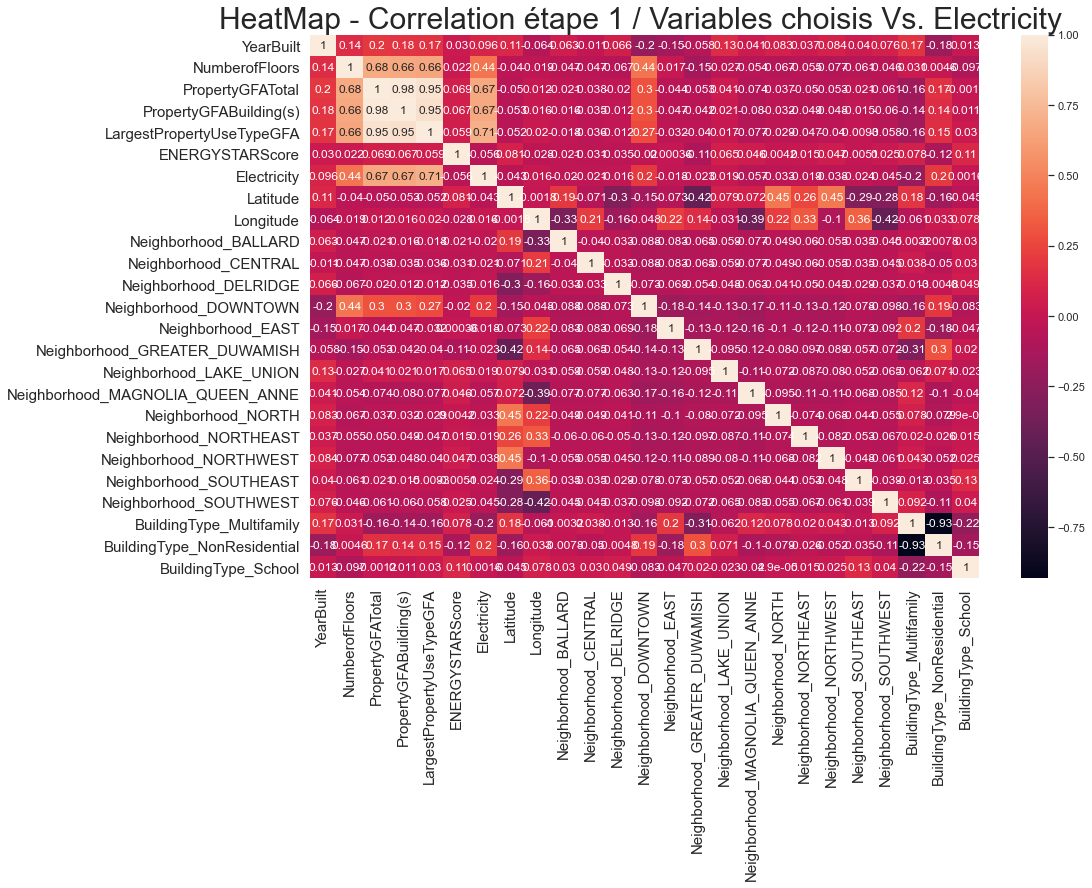

In [5]:

#On garde les variables Fixes
data_04 = data03.dropna()
data_05 = pd.DataFrame(data_04)
corr = data_05.astype('float64').corr()

corr_filter_0 = corr["Electricity"]
corr_filter_0 = corr_filter_0.to_frame().reset_index()
corr_filter_1 = corr_filter_0.sort_values(by=['Electricity'], ascending=False)
corr_filter_2 = corr_filter_1[corr_filter_1.Electricity > 0.40]

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.title("HeatMap - Correlation étape 1 / Variables choisis Vs. Electricity ", fontsize=30)
plt.yticks(fontsize= 15)
plt.xticks(fontsize= 15)
plt.savefig('elec_1.png')
plt.show()

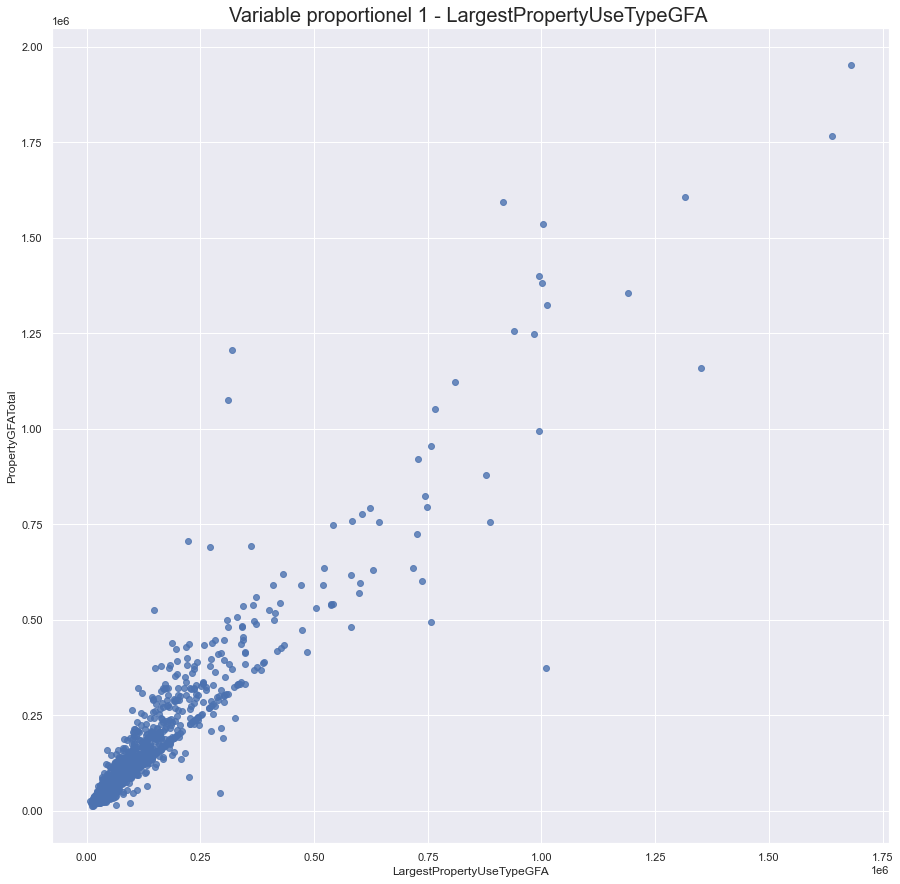

In [6]:
#Verification prop
sns.regplot(x=data_05["LargestPropertyUseTypeGFA"], y=data_05["PropertyGFATotal"], fit_reg=False)
plt.title("Variable proportionel 1 - LargestPropertyUseTypeGFA ", fontsize=20)
plt.savefig('elec_2.png')
plt.show()

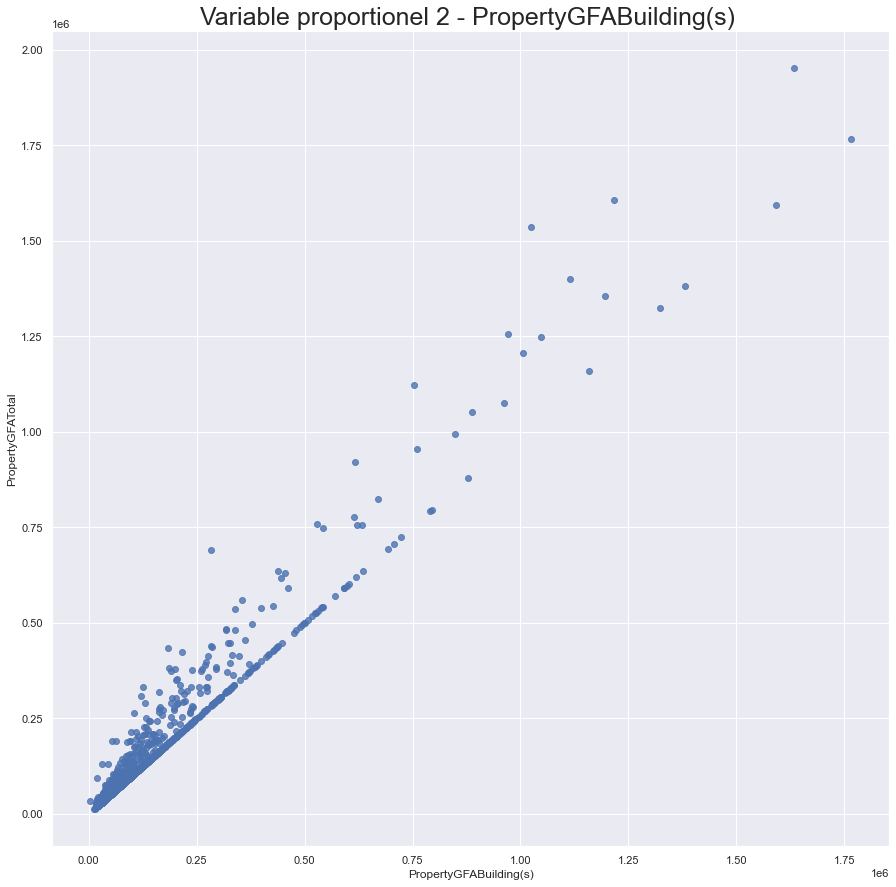

In [7]:
sns.regplot(x=data_05["PropertyGFABuilding(s)"], y=data_05["PropertyGFATotal"], fit_reg=False)
plt.title("Variable proportionel 2 - PropertyGFABuilding(s) ", fontsize=25)
plt.savefig('elec_3.png')
plt.show()

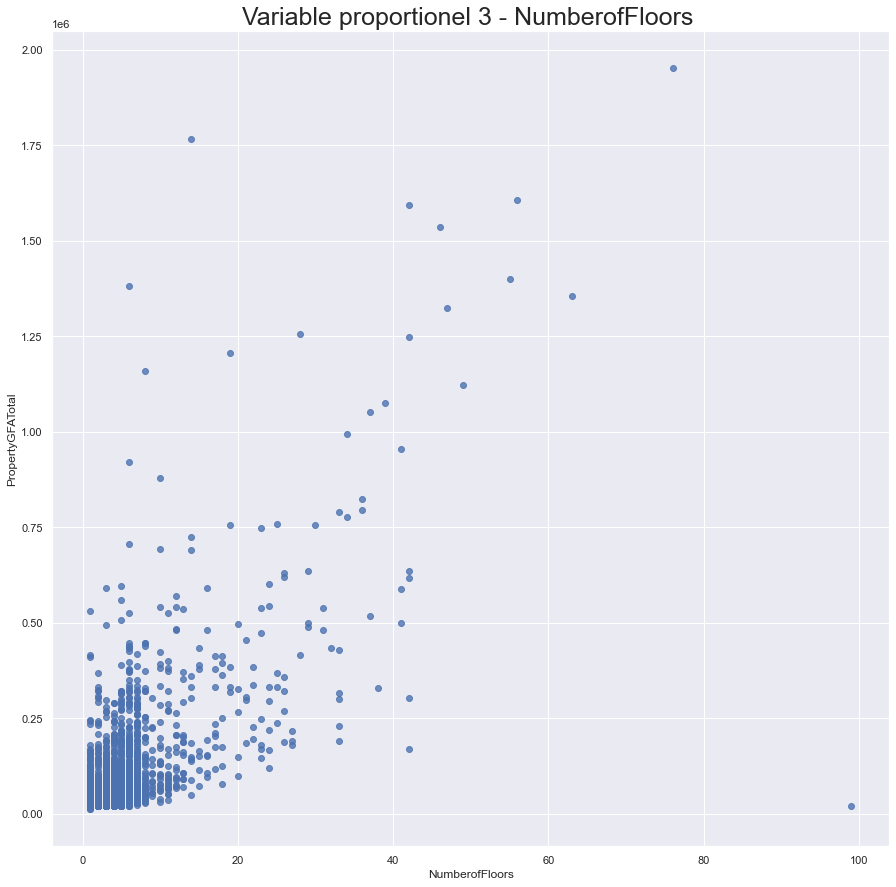

In [8]:
sns.regplot(x=data_05["NumberofFloors"], y=data_05["PropertyGFATotal"], fit_reg=False)
plt.title("Variable proportionel 3 - NumberofFloors ", fontsize=25)
plt.savefig('elec_4.png')
plt.show()

# On supprime les variables proportionnelles

/Users/soso/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      YearBuilt  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
3261     2013.0             6.0           52000.0            100.0   
175      1928.0             2.0           55653.0             98.0   
3396     2015.0             7.0           41384.0            100.0   
268      1960.0             1.0           52311.0             96.0   
1663     1908.0             3.0           29970.0            100.0   
...         ...             ...               ...              ...   
124      1953.0            10.0          879000.0             10.0   
625      1994.0            14.0         1765970.0             54.0   
35       1992.0             3.0          494835.0              8.0   
171      2000.0             8.0         1158691.0             29.0   
564      1981.0            33.0          429405.0             98.0   

       Electricity   Latitude   Longitude  Neighborhood_BALLARD  \
3261 -3.382680e+04  47.614320 -122.312570                     0   
175   1.798900e+03  47.66

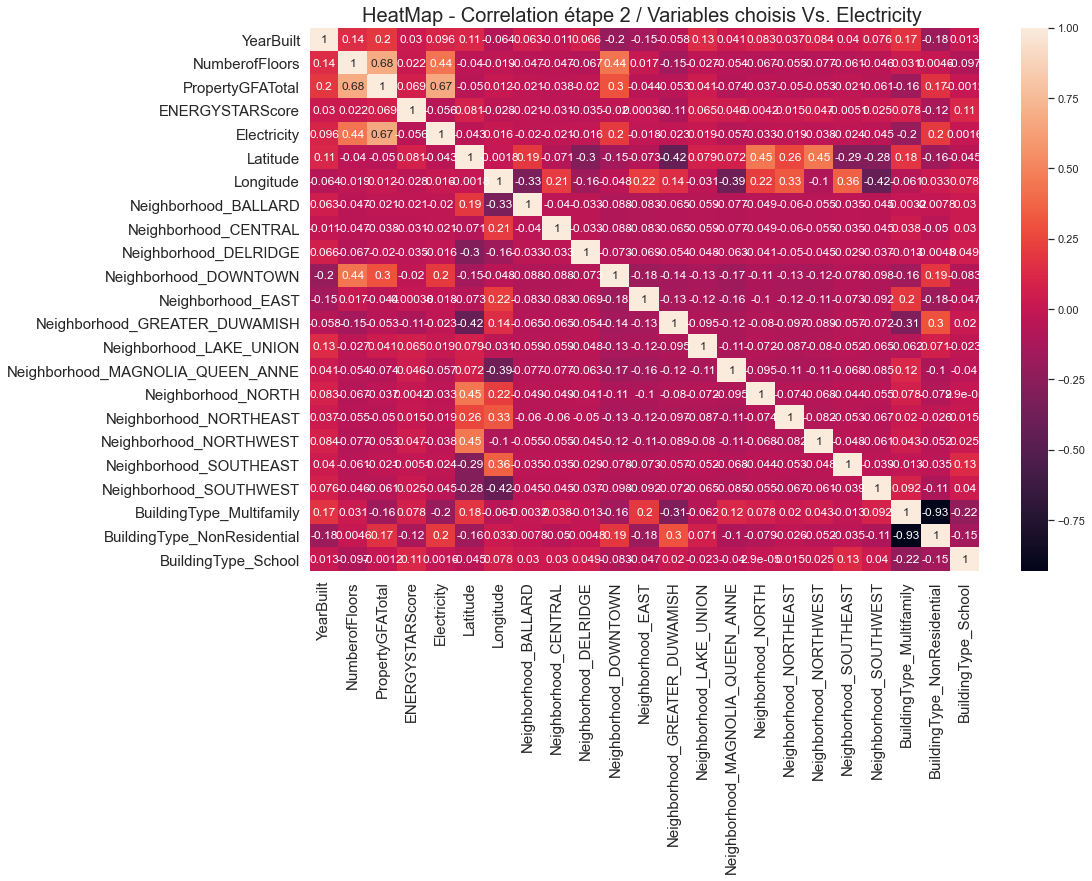

In [9]:

data_04.drop('PropertyGFABuilding(s)', inplace=True, axis=1)
data_04.drop('LargestPropertyUseTypeGFA', inplace=True, axis=1)



new_data = data_04[(data_04[['Electricity','Longitude','Latitude',"ENERGYSTARScore"]] != 0.000000).all(axis=1)]
new_data.astype(int).describe()
print(new_data)
corr = new_data.astype('float64').corr()

corr_filter_0 = corr["Electricity"]
corr_filter_0 = corr_filter_0.to_frame().reset_index()
corr_filter_1 = corr_filter_0.sort_values(by=['Electricity'], ascending=False)
corr_filter_2 = corr_filter_1[corr_filter_1.Electricity > 0.40]

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.title("HeatMap - Correlation étape 2 / Variables choisis Vs. Electricity ", fontsize=20)
plt.yticks(fontsize= 15)
plt.xticks(fontsize= 15)
plt.savefig('elec_5.png')
plt.show()

# On compare les modeles

In [10]:
new_data.columns

Index(['YearBuilt', 'NumberofFloors', 'PropertyGFATotal', 'ENERGYSTARScore',
       'Electricity', 'Latitude', 'Longitude', 'Neighborhood_BALLARD',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER_DUWAMISH', 'Neighborhood_LAKE_UNION',
       'Neighborhood_MAGNOLIA_QUEEN_ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST',
       'BuildingType_Multifamily', 'BuildingType_NonResidential',
       'BuildingType_School'],
      dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
keepCols = ['YearBuilt', 'NumberofFloors', 'PropertyGFATotal', 'ENERGYSTARScore',
       'Electricity', 'Latitude', 'Longitude', 'Neighborhood_BALLARD',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER_DUWAMISH', 'Neighborhood_LAKE_UNION',
       'Neighborhood_MAGNOLIA_QUEEN_ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST',
       'BuildingType_Multifamily', 'BuildingType_NonResidential',
       'BuildingType_School']
scaled_df = scaler.fit_transform(new_data[keepCols])
new_data = pd.DataFrame(scaled_df, columns=keepCols)

0.36114678731770544
0.5837560100809492
0.5224208232344202
0.5162605302877546


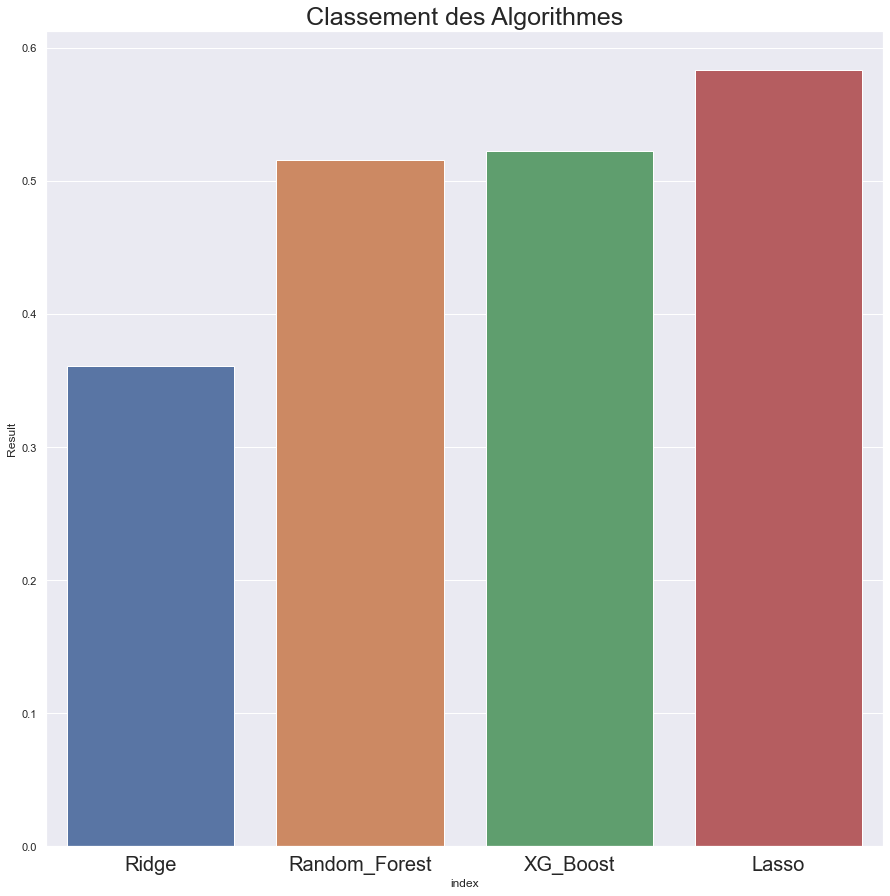

In [26]:
#Import the function
target_column = ['Electricity'] 
predictors =  ['YearBuilt', 'PropertyGFATotal', 'ENERGYSTARScore',
       'Latitude', 'Longitude','Neighborhood_BALLARD',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER_DUWAMISH', 'Neighborhood_LAKE_UNION',
       'Neighborhood_MAGNOLIA_QUEEN_ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST',
       'BuildingType_Multifamily', 'BuildingType_NonResidential',
       'BuildingType_School'] 

X = new_data[predictors].values
y = new_data[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

ridgeReg = Ridge()
ridgeReg.fit(X_train,y_train)
pred_rid = ridgeReg.predict(X_test)
RMSE_Ridge = np.sqrt(metrics.mean_squared_error(y_test, pred_rid))
R2_Ridge = r2_score(y_test, pred_rid)
print(RMSE_Ridge )

regressor = Lasso()
regressor.fit(X_train, y_train)
pred_lin = regressor.predict(X_test)
RMSE_Linear = np.sqrt(metrics.mean_squared_error(y_test, pred_lin))
R2_Linear = r2_score(y_test, pred_lin)
print(RMSE_Linear )

xg_reg = xgb.XGBRegressor()
XG_fit = xg_reg.fit(X_train,y_train)
pred_xg = xg_reg.predict(X_test)
RMSE_XG = np.sqrt(metrics.mean_squared_error(y_test, pred_xg))
R2_XG = r2_score(y_test, pred_xg)
print(RMSE_XG )

randomforest=RandomForestRegressor(random_state=42)
randomforest_fit = randomforest.fit(X_train, y_train)
pred_rf=randomforest.predict(X_test)
RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test, pred_rf))
R2_RF = r2_score(y_test, pred_rf)
print(RMSE_RF )



d = {'Result': [RMSE_RF,RMSE_Ridge,RMSE_Linear,RMSE_XG]}

df = pd.DataFrame(data=d)
df1 = df.rename(index={0: "Random_Forest", 1: "Ridge", 2: "Lasso", 3: "XG_Boost"})
df2 = df1.sort_values(by=['Result'])
df3 = df2.reset_index()

ax = sns.barplot(x="index", y="Result", data=df3, ci=68)
plt.title("Classement des Algorithmes", fontsize=25) 
plt.savefig('elec_6.png')
plt.xticks(fontsize= 20)
base_ridge = RMSE_Ridge
base_lasso = RMSE_Linear

df_rf_0 = RMSE_RF


Text(0.5, 1.0, 'Emission CO2 - Feature Importance - Random Forest')

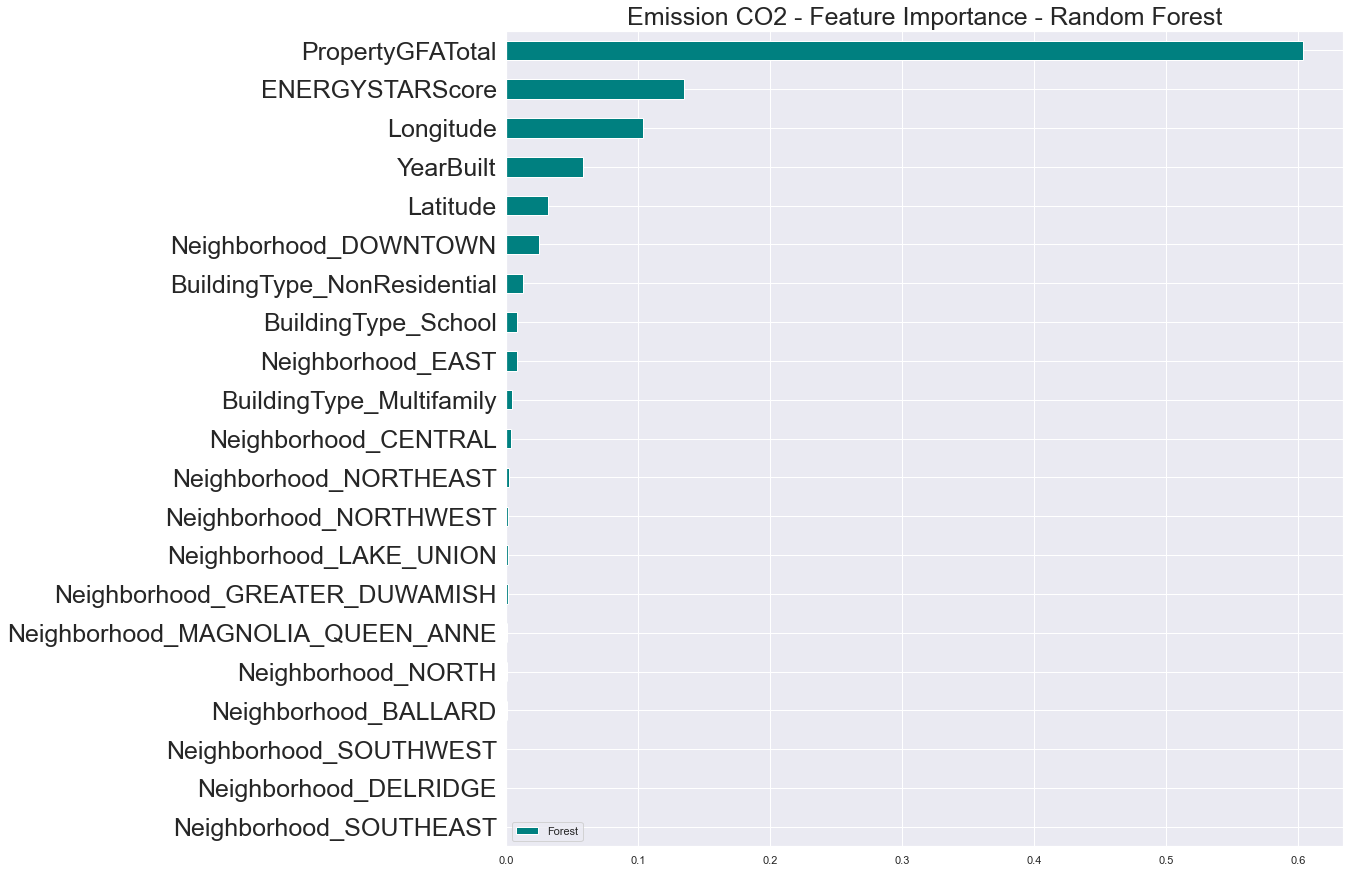

In [13]:
# Graph - Features SANS ENERGy
f = randomforest.feature_importances_
df_rf= pd.DataFrame(data=f, index=[
       'YearBuilt', 'PropertyGFATotal', 'ENERGYSTARScore',
       'Latitude', 'Longitude','Neighborhood_BALLARD',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER_DUWAMISH', 'Neighborhood_LAKE_UNION',
       'Neighborhood_MAGNOLIA_QUEEN_ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST',
       'BuildingType_Multifamily', 'BuildingType_NonResidential',
       'BuildingType_School'
], columns=["Forest"])

# Graph - Features SANS ENERGy
f = randomforest.feature_importances_
df_rf= pd.DataFrame(data=f, index=[
     'YearBuilt', 'PropertyGFATotal', 'ENERGYSTARScore',
       'Latitude', 'Longitude','Neighborhood_BALLARD',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER_DUWAMISH', 'Neighborhood_LAKE_UNION',
       'Neighborhood_MAGNOLIA_QUEEN_ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST',
       'BuildingType_Multifamily', 'BuildingType_NonResidential',
       'BuildingType_School'
]
, columns=["Forest"])
df_rf = df_rf.sort_values(by=['Forest'])
df_rf.plot(kind='barh', color = 'teal')
plt.yticks(fontsize= 25)
plt.savefig('elec_7.png')
plt.title("Emission CO2 - Feature Importance - Random Forest", fontsize=25)

In [14]:
#def main():
#    clf = RandomForestRegressor(random_state=42)
#    parameters = {
#        'n_estimators':[1,10, 25, 50],
#        'min_samples_split':[10, 25, 50],
#        'min_samples_leaf':[1,2,3,5,7,10, 25, 50],        
#        'min_weight_fraction_leaf':[0.0, 0.5, 0.9],
#        'min_impurity_decrease':[0.0, 0.5, 0.9],
#        'verbose':[0,1,5]}
#    clf1 = GridSearchCV(clf, parameters, n_jobs=1, cv=2)
#    clf1.fit(X_train, y_train)
#    best_parameters = clf1.best_params_
#    return print('GridSearchCV Results: ',best_parameters)
#
#print('==============feature importances - Apply =======================')               
#print('XGBoost best_params_ ------ XXX --------:',main() ) 
#print('===============================================================')
#
#GridSearchCV Results:  {'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 25, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'verbose': 0}

In [15]:
import warnings
warnings.filterwarnings('ignore')



#Import the function - DE BASE 

pred1 =  [
'Neighborhood_LAKE_UNION'           ,
'Neighborhood_BALLARD'              ,
'Neighborhood_MAGNOLIA_QUEEN_ANNE'  ,
'Neighborhood_NORTH'                ,
'Neighborhood_SOUTHWEST'            ,
'BuildingType_Multifamily'          ,
'BuildingType_NonResidential'       ,
'Neighborhood_NORTHWEST'            ,
'Neighborhood_EAST'                 ,
'Neighborhood_DOWNTOWN'             ,
'Neighborhood_NORTHEAST'            ,
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 ] 


pred2 =  [
'Neighborhood_NORTH'                ,
'Neighborhood_SOUTHWEST'            ,
'BuildingType_Multifamily'          ,
'BuildingType_NonResidential'       ,
'Neighborhood_NORTHWEST'            ,
'Neighborhood_EAST'                 ,
'Neighborhood_DOWNTOWN'             ,
'Neighborhood_NORTHEAST'            ,
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 ] 


pred3 =  [
'BuildingType_NonResidential'       ,
'Neighborhood_NORTHWEST'            ,
'Neighborhood_EAST'                 ,
'Neighborhood_DOWNTOWN'             ,
'Neighborhood_NORTHEAST'            ,
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 
] 

pred4 =  [
'Neighborhood_DOWNTOWN'             ,
'Neighborhood_NORTHEAST'            ,
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 
] 

pred5 =  [
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 
] 

pred6 =  [
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 
] 

def featureImp (pred) :
    X = new_data[pred].values
    y = new_data[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
    randomforest= RandomForestRegressor(random_state=42)
    randomforest_fit = randomforest.fit(X_train, y_train)
    pred_rf=randomforest.predict(X_test)
    RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test, pred_rf))
    R2_RF = r2_score(y_test, pred_rf)
    return RMSE_RF


def featureImpWFE (pred) :
    X = new_data[pred].values
    y = new_data[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
    randomforest= RandomForestRegressor (min_impurity_decrease= 0.0,
                                         min_samples_leaf= 2, 
                                         min_samples_split= 25,
                                         min_weight_fraction_leaf= 0.0,
                                         n_estimators= 10, 
                                         verbose= 0)
    randomforest_fit = randomforest.fit(X_train, y_train)
    pred_rf=randomforest.predict(X_test)
    RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test, pred_rf))
    R2_RF = r2_score(y_test, pred_rf)
    return RMSE_RF


df_rf = pd.DataFrame(columns=['RMSE_RF', 'CODE'])  

df_rf.loc[0] = [featureImp(pred1), "1.1"] 
df_rf.loc[1] = [featureImp(pred2), "1.2"] 
df_rf.loc[2] = [featureImp(pred3), "1.3"] 
df_rf.loc[3] = [featureImp(pred4), "1.4"] 
df_rf.loc[4] = [featureImp(pred5), "1.5"] 
df_rf.loc[5] = [featureImp(pred6), "1.6"] 

df_rf.loc[6] = [featureImpWFE (pred1), "2.1"] 
df_rf.loc[7] = [featureImpWFE (pred2), "2.2"] 
df_rf.loc[8] = [featureImpWFE (pred3), "2.3"] 
df_rf.loc[9] = [featureImpWFE (pred4), "2.4"] 
df_rf.loc[10] = [featureImpWFE(pred5), "2.5"] 
df_rf.loc[11] = [featureImpWFE(pred6), "2.6"] 


df_rf = df_rf.sort_values(by=['RMSE_RF'])
print(df_rf)
df_rf_0 = 0.501090
df_rf_1 = df_rf['RMSE_RF'].min()
df_rf_2 = df_rf['RMSE_RF'].mean()
df_rf_3 = df_rf['RMSE_RF'].max()

     RMSE_RF CODE
7   0.363661  2.2
9   0.454355  2.4
8   0.493258  2.3
0   0.501090  1.1
1   0.517024  1.2
2   0.519423  1.3
4   0.574183  1.5
3   0.576057  1.4
10  0.680942  2.5
6   0.688957  2.1
5   0.745135  1.6
11  0.820032  2.6


In [16]:
import warnings
warnings.filterwarnings('ignore')



#Import the function - DE BASE 

pred1 =  [
'Neighborhood_LAKE_UNION'           ,
'Neighborhood_BALLARD'              ,
'Neighborhood_MAGNOLIA_QUEEN_ANNE'  ,
'Neighborhood_NORTH'                ,
'Neighborhood_SOUTHWEST'            ,
'BuildingType_Multifamily'          ,
'BuildingType_NonResidential'       ,
'Neighborhood_NORTHWEST'            ,
'Neighborhood_EAST'                 ,
'Neighborhood_DOWNTOWN'             ,
'Neighborhood_NORTHEAST'            ,
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 ] 


pred2 =  [
'Neighborhood_NORTH'                ,
'Neighborhood_SOUTHWEST'            ,
'BuildingType_Multifamily'          ,
'BuildingType_NonResidential'       ,
'Neighborhood_NORTHWEST'            ,
'Neighborhood_EAST'                 ,
'Neighborhood_DOWNTOWN'             ,
'Neighborhood_NORTHEAST'            ,
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 ] 


pred3 =  [
'BuildingType_NonResidential'       ,
'Neighborhood_NORTHWEST'            ,
'Neighborhood_EAST'                 ,
'Neighborhood_DOWNTOWN'             ,
'Neighborhood_NORTHEAST'            ,
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 
] 

pred4 =  [
'Neighborhood_DOWNTOWN'             ,
'Neighborhood_NORTHEAST'            ,
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 
] 

pred5 =  [
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 
] 

pred6 =  [
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 
] 

def featureImp (pred) :
    X = new_data[pred].values
    y = new_data[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
    randomforest= RandomForestRegressor(random_state=42)
    randomforest_fit = randomforest.fit(X_train, y_train)
    pred_rf=randomforest.predict(X_test)
    RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test, pred_rf))
    R2_RF = r2_score(y_test, pred_rf)
    return R2_RF


def featureImpWFE (pred) :
    X = new_data[pred].values
    y = new_data[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
    randomforest= RandomForestRegressor (min_impurity_decrease= 0.0,
                                         min_samples_leaf= 2, 
                                         min_samples_split= 25,
                                         min_weight_fraction_leaf= 0.0,
                                         n_estimators= 10, 
                                         verbose= 0)
    randomforest_fit = randomforest.fit(X_train, y_train)
    pred_rf=randomforest.predict(X_test)
    RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test, pred_rf))
    R2_RF = r2_score(y_test, pred_rf)
    return R2_RF


df_rf = pd.DataFrame(columns=['RMSE_RF', 'CODE'])  

df_rf.loc[0] = [featureImp(pred1), "1.1"] 
df_rf.loc[1] = [featureImp(pred2), "1.2"] 
df_rf.loc[2] = [featureImp(pred3), "1.3"] 
df_rf.loc[3] = [featureImp(pred4), "1.4"] 
df_rf.loc[4] = [featureImp(pred5), "1.5"] 
df_rf.loc[5] = [featureImp(pred6), "1.6"] 

df_rf.loc[6] = [featureImpWFE (pred1), "2.1"] 
df_rf.loc[7] = [featureImpWFE (pred2), "2.2"] 
df_rf.loc[8] = [featureImpWFE (pred3), "2.3"] 
df_rf.loc[9] = [featureImpWFE (pred4), "2.4"] 
df_rf.loc[10] = [featureImpWFE(pred5), "2.5"] 
df_rf.loc[11] = [featureImpWFE(pred6), "2.6"] 

#df_rf = df_rf.sort_values(by=['RMSE_RF'])
#print(df_rf)
#df_rf_0 = 0.501090
#df_rf_1 = df_rf['RMSE_RF'].min()
#df_rf_2 = df_rf['RMSE_RF'].mean()
#df_rf_3 = df_rf['RMSE_RF'].max()

In [17]:
import warnings
warnings.filterwarnings('ignore')



#Import the function - DE BASE 

pred1 =  [
'Neighborhood_LAKE_UNION'           ,
'Neighborhood_BALLARD'              ,
'Neighborhood_MAGNOLIA_QUEEN_ANNE'  ,
'Neighborhood_NORTH'                ,
'Neighborhood_SOUTHWEST'            ,
'BuildingType_Multifamily'          ,
'BuildingType_NonResidential'       ,
'Neighborhood_NORTHWEST'            ,
'Neighborhood_EAST'                 ,
'Neighborhood_DOWNTOWN'             ,
'Neighborhood_NORTHEAST'            ,
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 ] 


pred2 =  [
'Neighborhood_NORTH'                ,
'Neighborhood_SOUTHWEST'            ,
'BuildingType_Multifamily'          ,
'BuildingType_NonResidential'       ,
'Neighborhood_NORTHWEST'            ,
'Neighborhood_EAST'                 ,
'Neighborhood_DOWNTOWN'             ,
'Neighborhood_NORTHEAST'            ,
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 ] 


pred3 =  [
'BuildingType_NonResidential'       ,
'Neighborhood_NORTHWEST'            ,
'Neighborhood_EAST'                 ,
'Neighborhood_DOWNTOWN'             ,
'Neighborhood_NORTHEAST'            ,
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 
] 

pred4 =  [
'Neighborhood_DOWNTOWN'             ,
'Neighborhood_NORTHEAST'            ,
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 
] 

pred5 =  [
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 
] 

pred6 =  [
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 
] 

def featureImp (pred) :
    X = new_data[pred].values
    y = new_data[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
    randomforest= RandomForestRegressor(random_state=42)
    randomforest_fit = randomforest.fit(X_train, y_train)
    pred_rf=randomforest.predict(X_test)
    MSE = mean_squared_error(y_test,pred_rf)
    return MSE


def featureImpWFE (pred) :
    X = new_data[pred].values
    y = new_data[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
    randomforest= RandomForestRegressor (min_impurity_decrease= 0.0,
                                         min_samples_leaf= 2, 
                                         min_samples_split= 25,
                                         min_weight_fraction_leaf= 0.0,
                                         n_estimators= 10, 
                                         verbose= 0)
    randomforest_fit = randomforest.fit(X_train, y_train)
    pred_rf=randomforest.predict(X_test)
    MSE = mean_squared_error(y_test,pred_rf)
    return MSE


df_rf = pd.DataFrame(columns=['RMSE_RF', 'CODE'])  

df_rf.loc[0] = [featureImp(pred1), "1.1"] 
df_rf.loc[1] = [featureImp(pred2), "1.2"] 
df_rf.loc[2] = [featureImp(pred3), "1.3"] 
df_rf.loc[3] = [featureImp(pred4), "1.4"] 
df_rf.loc[4] = [featureImp(pred5), "1.5"] 
df_rf.loc[5] = [featureImp(pred6), "1.6"] 

df_rf.loc[6] = [featureImpWFE (pred1), "2.1"] 
df_rf.loc[7] = [featureImpWFE (pred2), "2.2"] 
df_rf.loc[8] = [featureImpWFE (pred3), "2.3"] 
df_rf.loc[9] = [featureImpWFE (pred4), "2.4"] 
df_rf.loc[10] = [featureImpWFE(pred5), "2.5"] 
df_rf.loc[11] = [featureImpWFE(pred6), "2.6"] 

#df_rf = df_rf.sort_values(by=['RMSE_RF'])
#print(df_rf)
##df_rf_0 = 0.501090
#df_rf_1 = df_rf['RMSE_RF'].min()
#df_rf_2 = df_rf['RMSE_RF'].mean()
#df_rf_3 = df_rf['RMSE_RF'].max()

# RIDGE

In [18]:

df_ri_0 = RMSE_Ridge 

In [19]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

alphas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge(normalize = True)
df_ri = pd.DataFrame(columns=['RMSE_Ridge', 'Coeff', 'Index'])  
index = 0 

for a in alphas:
    ridge2 = Ridge(alpha = a, normalize = True)
    ridge2.fit(X_train, y_train)   
    pred2 = ridge2.predict(X_test)   
    rmse_r = np.sqrt(metrics.mean_squared_error(y_test, pred2))
    df_ri.loc[index] = [rmse_r, a, index] 
    index += 1 





df_ri = df_ri.sort_values(by=['RMSE_Ridge'])
df_ri_1 = df_ri['RMSE_Ridge'].min()
df_ri_2 = df_ri['RMSE_Ridge'].mean()
df_ri_3 = df_ri['RMSE_Ridge'].max()
df_ri_1
# Coef : 4.348745e-01

0.29618632672542217

0.36114678731770544 ------ 0.5837560099190151 ------ 0.5187410119183224 ------ 0.29618632672542217 ------


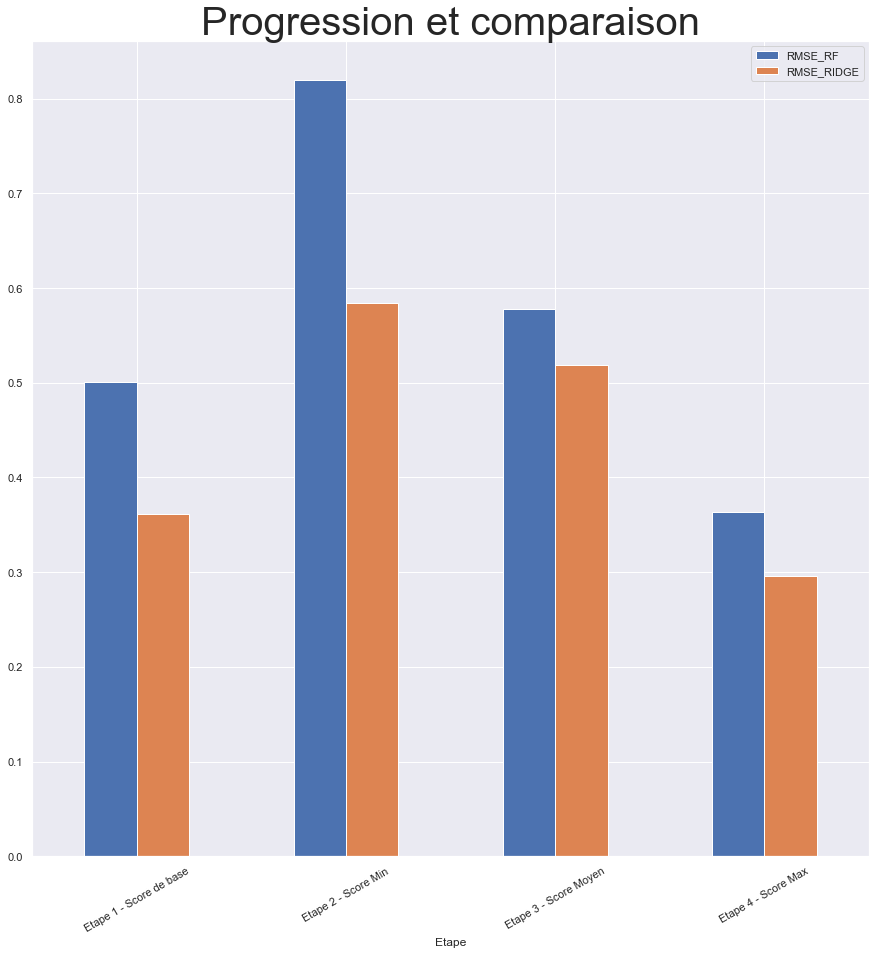

In [20]:
data_la = [['Etape 1 - Score de base', df_rf_0],
        ['Etape 1 - Score Min', df_rf_3], 
        ['Etape 2 - Score Moyen', df_rf_2], 
        ['Etape 3 - Score Max', df_rf_1]]
df_la = pd.DataFrame(data_la, columns = ['Etape_', 'RMSE_RF'])

data_ri = [['Etape 1 - Score de base', df_ri_0],
        ['Etape 2 - Score Min', df_ri_3], 
        ['Etape 3 - Score Moyen', df_ri_2], 
        ['Etape 4 - Score Max', df_ri_1]]
print(df_ri_0 , "------",df_ri_3 , "------",df_ri_2 , "------",df_ri_1 , "------")

df_ri = pd.DataFrame(data_ri, columns = ['Etape', "RMSE_RIDGE"])

result = pd.concat([df_la, df_ri], axis=1)

result.plot(x="Etape", y=["RMSE_RF", "RMSE_RIDGE"], kind="bar")
plt.title("Progression et comparaison", fontsize=40)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig('elec_8.png')

////////////////////////////////////////////////////////////////


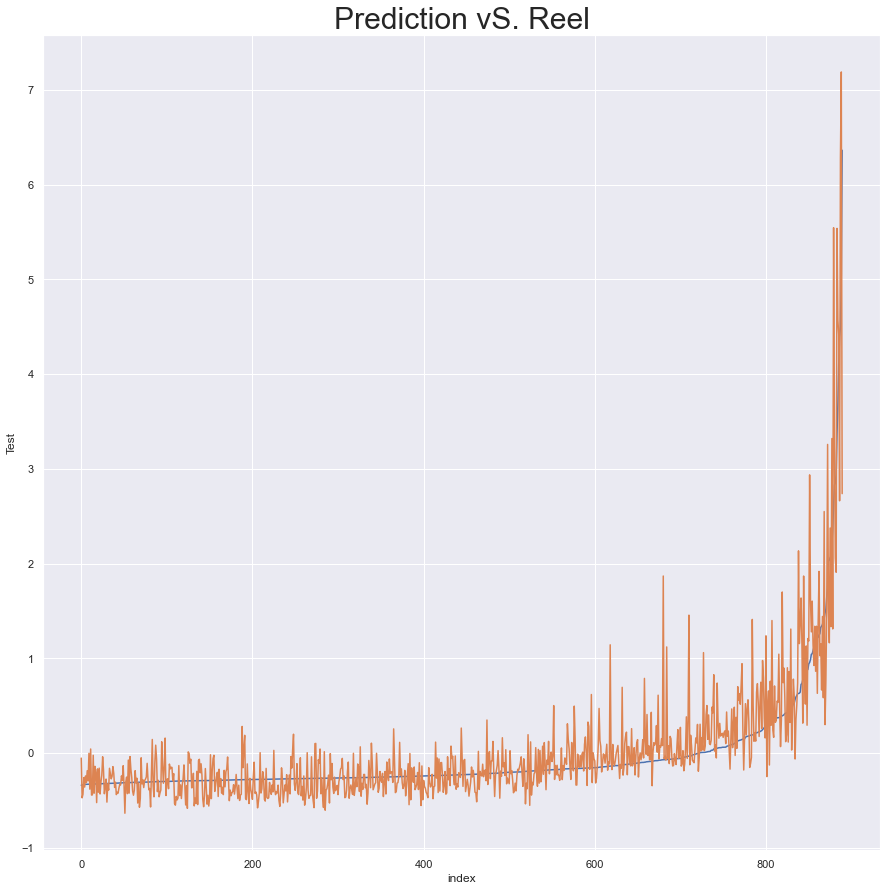

In [21]:
# Visualising the results
print("////////////////////////////////////////////////////////////////")
a03 = pd.DataFrame(y_test)
a03 = a03.rename(columns={0: 'Test'})
b03 = pd.DataFrame(pred2)
b03 = b03.rename(columns={0: 'Pred'})
c03= pd.concat([a03, b03], axis=1)
c03.head(30)
dat01 = c03.sort_values(by=['Test'], ascending=True)
a = dat01.reset_index()
b = a.rename(columns={'index': "xxx"})
c = b.reset_index()
c.drop('xxx', inplace=True, axis=1)
import seaborn as sns

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="index", y="Test",data=c)
sns.lineplot(x="index", y="Pred",data=c)
plt.title("Prediction vS. Reel", fontsize=30)
plt.savefig('elec_9.png')


In [22]:
c.tail(20)

,index,Test,Pred
870,870,1.519737,0.769982
871,871,1.649116,1.526858
872,872,1.735780,3.258454
873,873,2.026463,1.521847
874,874,2.036988,1.164454
875,875,2.063432,2.375813
876,876,2.078244,1.334908
877,877,2.202899,3.320688
878,878,2.366157,1.310881
879,879,2.620378,5.545759


# SANS ENERGY SCORE

      Energy_Star_Score  RMSE_Ridge
0  Avec EnergyStarScore    0.296186
1  Sans EnergyStarScore    0.304470


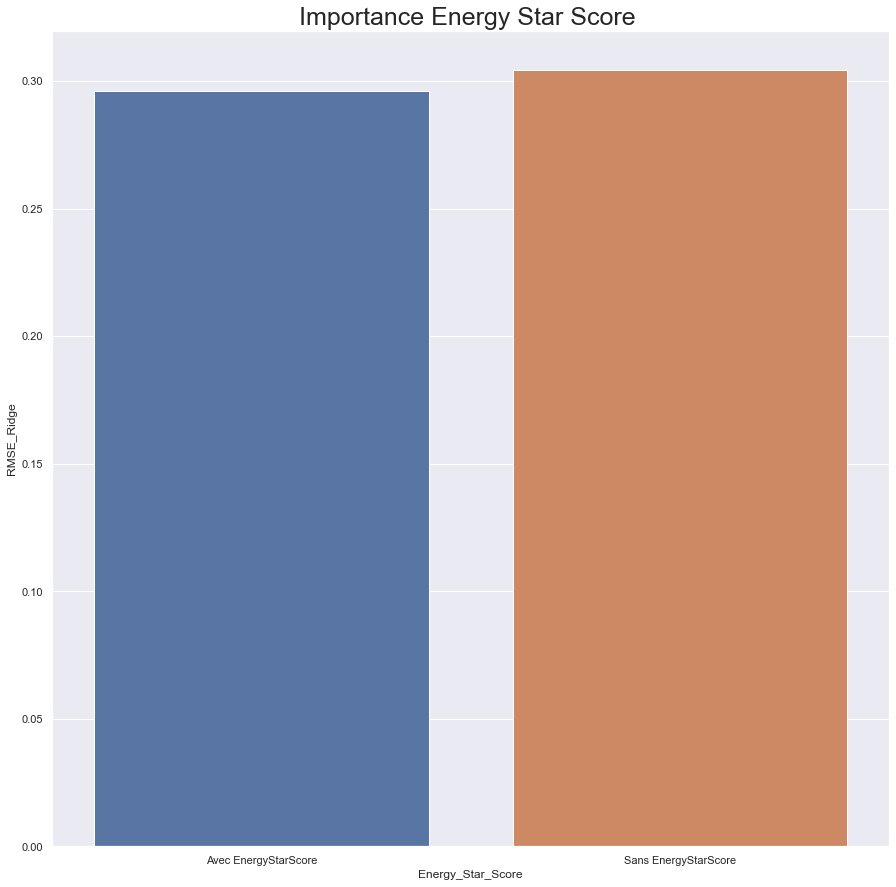

In [23]:
#Import the function
target_column = ['Electricity'] 
pred_avec =  ['YearBuilt', 'PropertyGFATotal', 'ENERGYSTARScore',
       'Latitude', 'Longitude','Neighborhood_BALLARD',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER_DUWAMISH', 'Neighborhood_LAKE_UNION',
       'Neighborhood_MAGNOLIA_QUEEN_ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST',
       'BuildingType_Multifamily', 'BuildingType_NonResidential',
       'BuildingType_School'] 

pred_sans =  ['YearBuilt', 'PropertyGFATotal',
       'Latitude', 'Longitude','Neighborhood_BALLARD',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER_DUWAMISH', 'Neighborhood_LAKE_UNION',
       'Neighborhood_MAGNOLIA_QUEEN_ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST',
       'BuildingType_Multifamily', 'BuildingType_NonResidential',
       'BuildingType_School'] 


def EnergyStarNeed(predictors):
    X = new_data[predictors].values
    y = new_data[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
    ridgeReg = Ridge(alpha = 4.348745e-01, normalize=True)
    ridgeReg.fit(X_train,y_train)
    pred_rid = ridgeReg.predict(X_test)
    RMSE_Ridge = np.sqrt(metrics.mean_squared_error(y_test, pred_rid))
    return RMSE_Ridge

data_f = [['Avec EnergyStarScore', EnergyStarNeed(pred_avec)], 
        ['Sans EnergyStarScore', EnergyStarNeed(pred_sans)]]
df_f = pd.DataFrame(data_f, columns = ['Energy_Star_Score', "RMSE_Ridge"])
print(df_f)

ax = sns.barplot(x="Energy_Star_Score", y="RMSE_Ridge", data=df_f, ci=68)
plt.title("Importance Energy Star Score ", fontsize=25)
plt.savefig('elec_11.png')


In [24]:
pred_sans =  ['YearBuilt', 'PropertyGFATotal',
       'Latitude', 'Longitude','Neighborhood_BALLARD',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER_DUWAMISH', 'Neighborhood_LAKE_UNION',
       'Neighborhood_MAGNOLIA_QUEEN_ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST',
       'BuildingType_Multifamily', 'BuildingType_NonResidential',
       'BuildingType_School'] 